In [58]:
import requests
import pandas as pd

# Bluesky API settings
BASE_URL = "https://public.api.bsky.app/xrpc"
USERNAME = "nytimes.com"  # Replace with your target handle
APP_PASSWORD = "q4zg-73ku-sdhu-omxu"  # Replace with your actual App Password

# Fetch followers function
def fetch_followers(username, limit=100):
    """
    Fetch followers for a given Bluesky handle.
    
    Args:
        username (str): The handle of the account (e.g., 'nytimes.com').
        limit (int): Number of followers to fetch per request.

    Returns:
        pd.DataFrame: DataFrame containing follower information.
    """
    url = f"{BASE_URL}/app.bsky.graph.getFollowers?actor={username}&limit={limit}"
    headers = {"Authorization": f"Bearer {APP_PASSWORD}"}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json().get("followers", [])
        return pd.DataFrame(data)
    else:
        print(f"Failed to fetch followers: {response.status_code}")
        return pd.DataFrame()

# Fetch followers
followers_df = fetch_followers(USERNAME)

# Save and display data
if not followers_df.empty:
    followers_df.to_csv("nytimes_followers.csv", index=False)

    print(followers_df.head())
else:
    print("No followers data fetched.")

print(f"Fetched {len(followers_df)} followers.")


                                did                        handle  \
0  did:plc:4f3agjw677gqfftm5ditqkwa           kikib13.bsky.social   
1  did:plc:gkc5qa4brcvkgvy4ye2h7cwp         punkybird.bsky.social   
2  did:plc:tjunwv5vk6wgvlamgnoge2zg         carolv75a.bsky.social   
3  did:plc:htmhhuafn43n7xfjssxzmo3f  stigrunejakobsen.bsky.social   
4  did:plc:cfuizyiqtx543cxabf3s6vjr      pattywolthof.bsky.social   

     displayName                                             avatar  \
0                 https://cdn.bsky.app/img/avatar/plain/did:plc:...   
1                 https://cdn.bsky.app/img/avatar/plain/did:plc:...   
2                 https://cdn.bsky.app/img/avatar/plain/did:plc:...   
3      Stig Rune  https://cdn.bsky.app/img/avatar/plain/did:plc:...   
4  Patty Wolthof  https://cdn.bsky.app/img/avatar/plain/did:plc:...   

                                              labels  \
0                                                 []   
1                                             

In [59]:
import requests
import pandas as pd

# Bluesky API settings
BASE_URL = "https://public.api.bsky.app/xrpc"
USERNAME = "ocasio-cortez.house.gov"  # Replace with your target handle
APP_PASSWORD = "q4zg-73ku-sdhu-omxu"  # Replace with your actual App Password

def fetch_all_followers(username, max_followers=4000, page_limit=100):
    """
    Fetch all followers for a given Bluesky handle, handling pagination correctly.
    
    Args:
        username (str): The handle of the account (e.g., 'nytimes.com').
        max_followers (int): Maximum number of followers to fetch.
        page_limit (int): Number of followers to fetch per request.

    Returns:
        pd.DataFrame: DataFrame containing follower information.
    """
    url = f"{BASE_URL}/app.bsky.graph.getFollowers?actor={username}&limit={page_limit}"
    headers = {"Authorization": f"Bearer {APP_PASSWORD}"}
    all_followers = []
    fetched_count = 0
    cursor = None

    while fetched_count < max_followers:
        if cursor:
            url = f"{BASE_URL}/app.bsky.graph.getFollowers?actor={username}&limit={page_limit}&cursor={cursor}"
        
        response = requests.get(url, headers=headers)
        
        if response.status_code == 200:
            data = response.json()
            followers = data.get("followers", [])
            all_followers.extend(followers)
            fetched_count += len(followers)
            print(f"Fetched {fetched_count} followers so far...")
            
            # Update the cursor for the next page
            cursor = data.get("cursor")
            if not cursor:
                break  # No more pages available
        else:
            print(f"Failed to fetch followers: {response.status_code}")
            break

    return pd.DataFrame(all_followers)

# Fetch followers
followers_df = fetch_all_followers(USERNAME, max_followers=1000)

# Save and display data
if not followers_df.empty:
    followers_df.to_csv("nytimes_followers.csv", index=False)

    print(followers_df.head())
else:
    print("No followers data fetched.")

print(f"Fetched {len(followers_df)} followers.")


Fetched 100 followers so far...
Fetched 200 followers so far...
Fetched 300 followers so far...
Fetched 400 followers so far...
Fetched 500 followers so far...
Fetched 599 followers so far...
Fetched 699 followers so far...
Fetched 799 followers so far...
Fetched 899 followers so far...
Fetched 999 followers so far...
Fetched 1098 followers so far...
                                did                         handle  \
0  did:plc:fyed7gu7dc3a2y4lkq4numkt              dpotr.bsky.social   
1  did:plc:qigqnhwxe6phwrg2keyy6wcx               mexz.bsky.social   
2  did:plc:k6zpbglcg56tyzknn2nj5sk3  advocatetherapist.bsky.social   
3  did:plc:4walwj45q4ue36ozgdtavyrj     blanketyblanks.bsky.social   
4  did:plc:fhnphuonsndlha5ygyvxnxvk     1nvisiblewoman.bsky.social   

   displayName                                             avatar labels  \
0       Doug P  https://cdn.bsky.app/img/avatar/plain/did:plc:...     []   
1         mexz  https://cdn.bsky.app/img/avatar/plain/did:plc:...     []  

In [60]:
# Bluesky API settings
BASE_URL = "https://public.api.bsky.app/xrpc"
APP_PASSWORD = "q4zg-73ku-sdhu-omxu"  # Replace with your actual App Password

# Keywords to filter accounts
KEYWORDS = ["democrat", "dec", "trump"]

# Function to fetch followers/following for an account
def fetch_connections(actor, connection_type="followers", max_connections=1000, page_limit=100):
    """
    Fetch connections (followers or following) for a given Bluesky account.

    Args:
        actor (str): The DID or handle of the account.
        connection_type (str): 'followers' or 'following'.
        max_connections (int): Maximum number of connections to fetch.
        page_limit (int): Number of connections to fetch per page.

    Returns:
        pd.DataFrame: DataFrame containing connection information.
    """
    url = f"{BASE_URL}/app.bsky.graph.get{connection_type.capitalize()}?actor={actor}&limit={page_limit}"
    headers = {"Authorization": f"Bearer {APP_PASSWORD}"}
    all_connections = []
    fetched_count = 0
    cursor = None

    while fetched_count < max_connections:
        if cursor:
            url = f"{BASE_URL}/app.bsky.graph.get{connection_type.capitalize()}?actor={actor}&limit={page_limit}&cursor={cursor}"
        
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            connections = data.get(connection_type, [])
            all_connections.extend(connections)
            fetched_count += len(connections)
            print(f"Fetched {fetched_count} {connection_type} for {actor}...")
            
            # Update the cursor for the next page
            cursor = data.get("cursor")
            if not cursor:
                break  # No more pages available
        else:
            print(f"Failed to fetch {connection_type} for {actor}: {response.status_code}")
            break

    return pd.DataFrame(all_connections)

# Load the previously fetched followers
followers_df = pd.read_csv("nytimes_followers.csv")

# Filter accounts based on keywords in description
filtered_accounts = followers_df[
    followers_df['description'].str.contains('|'.join(KEYWORDS), case=False, na=False)
]

print(f"Found {len(filtered_accounts)} accounts matching keywords.")

# Fetch followers and follows for the filtered accounts
connections_data = []
for index, row in filtered_accounts.iterrows():
    actor = row['did']
    
    # Fetch followers
    followers = fetch_connections(actor, connection_type="followers", max_connections=500)
    followers['type'] = "followers"
    followers['source_actor'] = actor
    connections_data.append(followers)
    
    # Fetch following
    following = fetch_connections(actor, connection_type="following", max_connections=500)
    following['type'] = "following"
    following['source_actor'] = actor
    connections_data.append(following)

# Combine all connection data into a single DataFrame
all_connections_df = pd.concat(connections_data, ignore_index=True)

# Save the results
all_connections_df.to_csv("filtered_connections.csv", index=False)

print(f"Saved data for {len(all_connections_df)} connections.")


Found 53 accounts matching keywords.
Fetched 93 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Fetched 190 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Fetched 290 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Fetched 390 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Fetched 490 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Fetched 586 followers for did:plc:hqtn2hlel3tnmlv6ukphuyvo...
Failed to fetch following for did:plc:hqtn2hlel3tnmlv6ukphuyvo: 501
Fetched 13 followers for did:plc:4ykckyjwqixxetzv53uszzxb...
Failed to fetch following for did:plc:4ykckyjwqixxetzv53uszzxb: 501
Fetched 7 followers for did:plc:7ufbjky6dnnmkvymrrdzext2...
Failed to fetch following for did:plc:7ufbjky6dnnmkvymrrdzext2: 501
Fetched 8 followers for did:plc:xp7mktf7ux6nsbn6e5itrxar...
Failed to fetch following for did:plc:xp7mktf7ux6nsbn6e5itrxar: 501
Fetched 94 followers for did:plc:p2b5tcx3mj24y3bf7532rtyr...
Fetched 192 followers for did:plc:p2b5tcx3mj24y3bf7532rtyr...
Fetched 291 foll

KeyboardInterrupt: 

In [41]:
print(all_connections_df.head(20))
print(all_connections_df)

                                 did                       handle  \
0   did:plc:xqcij5xi32dpesofx3pznzxc        bebeward1.bsky.social   
1   did:plc:jmn6hi2mxn3g2xuhleocj2qk          catgurl.bsky.social   
2   did:plc:orygrp6nnu4lixuuaje6ltl5       anita-vent.bsky.social   
3   did:plc:lt6ol2jm6afptgbcir3apwi4          joaneef.bsky.social   
4   did:plc:tykz5c7hcgmz5jyws2mnsujl             5iii.bsky.social   
5   did:plc:sunr6z4kvwrevadoa6ikitf3    psychicviolet.bsky.social   
6   did:plc:axevextc5hh3mxkihcfbu2dq         smein101.bsky.social   
7   did:plc:v4maxlmza5pfdbvuxokq7vrl             i5ll.bsky.social   
8   did:plc:ypqtjeiuwegv47h5usqi3mbw       charlidog1.bsky.social   
9   did:plc:wtq3ja7mk3zoawzqowkqo4ar         normajbf.bsky.social   
10  did:plc:32klse3f6gvuoqqkbdth3cmd         jjfroggy.bsky.social   
11  did:plc:5gnkpgtabey6k5tb6egcnr7w       aliadair22.bsky.social   
12  did:plc:ewshsprecajs7hfhw7235sci          rpierce.bsky.social   
13  did:plc:kraosnpendv53moree37so

In [ ]:
print(followers_df.head(10))
print(len(followers_df))

                                did                          handle  \
0  did:plc:4nactsnu2nyertryhurjakwb          wormtongue.bsky.social   
1  did:plc:xzteqos2rx5b72vfqbrbt7oe  yet-another-detour.bsky.social   
2  did:plc:eb4456pnebrvvmkcbf5jf3yq            tckteach.bsky.social   
3  did:plc:fq3t4yqgtnuebv4xsaptivak           conorjmcn.bsky.social   
4  did:plc:ea3mluwhw5et6qhxkx7sybtx          friispirit.bsky.social   
5  did:plc:dxiqlesuld2nybe4kdoq2bl2             sarahog.bsky.social   
6  did:plc:wfmt5oyty2lzveztp3i5ajjl       samsforreal72.bsky.social   
7  did:plc:byjhl7extnzqkj7gus3aio7h   phuckwhoisthisguy.bsky.social   
8  did:plc:jbrglwpuuh7s7ehwwrojqzhf             okdaveh.bsky.social   
9  did:plc:4zvysth6c3htjc6gcvs76axs             cyt1970.bsky.social   

                                 displayName  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                         

In [44]:
# Step 1: Extract 'did' and 'handle' 
followers_nodes = followers_df[['did', 'handle']].rename(columns={'did': 'id', 'handle': 'label'})
connections_nodes = all_connections_df[['did', 'handle']].rename(columns={'did': 'id', 'handle': 'label'})

# Step 3: Combine both DataFrames and remove duplicates
nodes_df = pd.concat([followers_nodes, connections_nodes], ignore_index=True).drop_duplicates()
new_row = pd.DataFrame([{'id': 'did:plc:p7gxyfr5vii5ntpwo7f6dhe2', 'label': 'aoc.bsky.social'}])
nodes_df = pd.concat([nodes_df, new_row], ignore_index=True)

# Save the nodes table for Gephi
#nodes_df.to_csv("nodes_table.csv", index=False)

print(nodes_df)
print(len(nodes_df))


                                     id                           label
0      did:plc:4nactsnu2nyertryhurjakwb          wormtongue.bsky.social
1      did:plc:xzteqos2rx5b72vfqbrbt7oe  yet-another-detour.bsky.social
2      did:plc:eb4456pnebrvvmkcbf5jf3yq            tckteach.bsky.social
3      did:plc:fq3t4yqgtnuebv4xsaptivak           conorjmcn.bsky.social
4      did:plc:ea3mluwhw5et6qhxkx7sybtx          friispirit.bsky.social
...                                 ...                             ...
13817  did:plc:fougk6qmjw7p3zfc2woqg7x6       zooted-comics.bsky.social
13818  did:plc:q3kvsr7iehj5jka25ymoeabn       comrademeagle.bsky.social
13819  did:plc:ix4hswli635mquet3yv5gryz          caligirl76.bsky.social
13820  did:plc:zz5l7nca2ad2jmi3qcmxro4v     traveleratheart.bsky.social
13821  did:plc:p7gxyfr5vii5ntpwo7f6dhe2                 aoc.bsky.social

[13822 rows x 2 columns]
13822


In [47]:
# Step 1: Create edges DataFrame 1 (Followers → AOC's DID)
edges_df1 = followers_df[['did']].rename(columns={'did': 'source'})
edges_df1['target'] = "did:plc:p7gxyfr5vii5ntpwo7f6dhe2"  # Assign AOC's DID as the target

# Step 2: Create edges DataFrame 2 (Connections from source_actor → handle)
edges_df2 = all_connections_df[['source_actor', 'did']].rename(
    columns={'source_actor': 'source', 'did': 'target'}
)

edges_df= pd.concat([edges_df1, edges_df2], ignore_index=True)

# Save both edge tables for Gephi
#edges_df1.to_csv("edges_followers_aoc.csv", index=False)
#edges_df2.to_csv("edges_connections.csv", index=False)

# Print confirmation
print(edges_df)
print(len(edges_df))


                                 source                            target
0      did:plc:4nactsnu2nyertryhurjakwb  did:plc:p7gxyfr5vii5ntpwo7f6dhe2
1      did:plc:xzteqos2rx5b72vfqbrbt7oe  did:plc:p7gxyfr5vii5ntpwo7f6dhe2
2      did:plc:eb4456pnebrvvmkcbf5jf3yq  did:plc:p7gxyfr5vii5ntpwo7f6dhe2
3      did:plc:fq3t4yqgtnuebv4xsaptivak  did:plc:p7gxyfr5vii5ntpwo7f6dhe2
4      did:plc:ea3mluwhw5et6qhxkx7sybtx  did:plc:p7gxyfr5vii5ntpwo7f6dhe2
...                                 ...                               ...
19124  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:q3kvsr7iehj5jka25ymoeabn
19125  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:ix4hswli635mquet3yv5gryz
19126  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:s6zn6cteu5f3za4vdvej7tx5
19127  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:zz5l7nca2ad2jmi3qcmxro4v
19128  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:td7vaysnlg2n2ya3ddjd4uou

[19129 rows x 2 columns]
19129


In [77]:
edges_df.to_excel(r"C:\Users\User\Documents\edges_data.xlsx", index=False)
nodes_df.to_excel(r"C:\Users\User\Documents\nodes.xlsx", index=False)
edges_df2.to_excel(r"C:\Users\User\Documents\egdes_sub.xlsx", index=False)

In [36]:
# Load the all_connections_df (make sure it's available in your project)
all_connections_df = pd.read_csv("filtered_connections.csv")  # Modify if needed

# Create the Edges Table (Follower → Following)
edges_df = all_connections_df[['source_actor', 'handle']].rename(
    columns={'source_actor': 'follower', 'handle': 'following'}
)

followers_reduced_df = followers_df[['did', 'handle']].rename(
    columns={'did': 'user_id', 'handle': 'username'}
)


# Save the edges table for Gephi
#edges_df.to_csv("edges_table.csv", index=False)

print(edges_df.head(10))

# Print confirmation
print("Edges table created and saved as 'edges_table.csv'")


                           follower                  following
0  did:plc:p2b5tcx3mj24y3bf7532rtyr      bebeward1.bsky.social
1  did:plc:p2b5tcx3mj24y3bf7532rtyr        catgurl.bsky.social
2  did:plc:p2b5tcx3mj24y3bf7532rtyr     anita-vent.bsky.social
3  did:plc:p2b5tcx3mj24y3bf7532rtyr        joaneef.bsky.social
4  did:plc:p2b5tcx3mj24y3bf7532rtyr           5iii.bsky.social
5  did:plc:p2b5tcx3mj24y3bf7532rtyr  psychicviolet.bsky.social
6  did:plc:p2b5tcx3mj24y3bf7532rtyr       smein101.bsky.social
7  did:plc:p2b5tcx3mj24y3bf7532rtyr           i5ll.bsky.social
8  did:plc:p2b5tcx3mj24y3bf7532rtyr     charlidog1.bsky.social
9  did:plc:p2b5tcx3mj24y3bf7532rtyr       normajbf.bsky.social
Edges table created and saved as 'edges_table.csv'


In [37]:
followers_reduced_df = followers_df[['did', 'handle']].rename(
    columns={'did': 'user_id', 'handle': 'username'}
)

print(followers_reduced_df.head(10))

                            user_id                        username
0  did:plc:4nactsnu2nyertryhurjakwb          wormtongue.bsky.social
1  did:plc:xzteqos2rx5b72vfqbrbt7oe  yet-another-detour.bsky.social
2  did:plc:eb4456pnebrvvmkcbf5jf3yq            tckteach.bsky.social
3  did:plc:fq3t4yqgtnuebv4xsaptivak           conorjmcn.bsky.social
4  did:plc:ea3mluwhw5et6qhxkx7sybtx          friispirit.bsky.social
5  did:plc:dxiqlesuld2nybe4kdoq2bl2             sarahog.bsky.social
6  did:plc:wfmt5oyty2lzveztp3i5ajjl       samsforreal72.bsky.social
7  did:plc:byjhl7extnzqkj7gus3aio7h   phuckwhoisthisguy.bsky.social
8  did:plc:jbrglwpuuh7s7ehwwrojqzhf             okdaveh.bsky.social
9  did:plc:4zvysth6c3htjc6gcvs76axs             cyt1970.bsky.social


In [42]:
import requests
import pandas as pd

# Bluesky API settings
BASE_URL = "https://public.api.bsky.app/xrpc"
USERNAME = "ocasio-cortez.house.gov"  # Target handle
APP_PASSWORD = "q4zg-73ku-sdhu-omxu"  # Replace with your actual App Password

def fetch_following(handle, limit=100, max_following=1000):
    """
    Fetch the list of accounts a user is following.

    Args:
        handle (str): The Bluesky handle to look up.
        limit (int): Number of accounts to fetch per request.
        max_following (int): Maximum number of following accounts to retrieve.

    Returns:
        pd.DataFrame: DataFrame containing the list of followed accounts.
    """
    url = f"{BASE_URL}/app.bsky.graph.getFollows?actor={handle}&limit={limit}"
    headers = {"Authorization": f"Bearer {APP_PASSWORD}"}
    
    all_following = []
    fetched_count = 0
    cursor = None

    while fetched_count < max_following:
        if cursor:
            url = f"{BASE_URL}/app.bsky.graph.getFollows?actor={handle}&limit={limit}&cursor={cursor}"

        response = requests.get(url, headers=headers)
        
        if response.status_code == 200:
            data = response.json()
            following = data.get("follows", [])  # Extract following list
            all_following.extend(following)
            fetched_count += len(following)
            print(f"Fetched {fetched_count} following accounts so far...")

            # Update the cursor for pagination
            cursor = data.get("cursor")
            if not cursor:
                break  # No more pages available
        else:
            print(f"Failed to fetch following accounts: {response.status_code}")
            break

    return pd.DataFrame(all_following)

# Fetch who @ocasio-cortez.house.gov is following
ocasio_following_df = fetch_following(USERNAME, max_following=1000)

# Save the results to a CSV file
if not ocasio_following_df.empty:
    ocasio_following_df.to_csv("ocasio_following.csv", index=False)
    print(f"Following accounts for {USERNAME} successfully saved as 'ocasio_following.csv'.")

# Display the first few rows
ocasio_following_df.head()


Fetched 1 following accounts so far...
Following accounts for ocasio-cortez.house.gov successfully saved as 'ocasio_following.csv'.


did           handle  \
0  did:plc:p7gxyfr5vii5ntpwo7f6dhe2  aoc.bsky.social   

                displayName  \
0  Alexandria Ocasio-Cortez   

                                              avatar labels  \
0  https://cdn.bsky.app/img/avatar/plain/did:plc:...     []   

                  createdAt  \
0  2023-04-27T19:39:34.920Z   

                                         description                 indexedAt  
0  Waitress turned Congresswoman for the Bronx an...  2024-11-25T23:52:14.147Z

In [53]:
most_followed = edges_df['target'].value_counts().head(10)
print("Top 10 Most Followed People:")
print(most_followed)

Top 10 Most Followed People:
target
did:plc:p7gxyfr5vii5ntpwo7f6dhe2    1097
did:plc:ziutcracpuog25ie6u7pp3ir      20
did:plc:aeurhcuz3buzlh72ghedpolw      12
did:plc:ujrt55wdbwu2452gx7oqj3p5      12
did:plc:m7kohv2fmoj5dbjvnimpluom      11
did:plc:ydfllvlbuxrac2xidiqr4h4n      11
did:plc:rgp3qag32mxc6ab5rwf3wxyg      11
did:plc:247igq2dcmlallbqbfo3dxld      10
did:plc:wezqvl727jfexmuug3koy6ec      10
did:plc:i2eg72xoxqlsdmxc7pxgpbav      10
Name: count, dtype: int64


In [ ]:
# Calculate number of nodes
nodes = set(edges_df['source']).union(set(edges_df['target']))
num_nodes = len(nodes)

# Calculate number of edges
num_edges = len(edges_df)

# Create an adjacency list from the edges table
adjacency_list = {}
for _, row in edges_df.iterrows():
    if row['source'] not in adjacency_list:
        adjacency_list[row['source']] = set()
    adjacency_list[row['source']].add(row['target'])

# Function to calculate shortest path lengths using BFS
def bfs_shortest_path_lengths(graph, start_node):
    visited = {start_node: 0}
    queue = [start_node]
    while queue:
        current_node = queue.pop(0)
        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                visited[neighbor] = visited[current_node] + 1
                queue.append(neighbor)
    return visited

# Calculate all-pairs shortest paths
all_shortest_paths = []
for node in nodes:
    shortest_paths = bfs_shortest_path_lengths(adjacency_list, node)
    all_shortest_paths.extend(shortest_paths.values())

# Calculate network diameter and average path length
if all_shortest_paths:
    network_diameter = max(all_shortest_paths)
    average_path_length = sum(all_shortest_paths) / len(all_shortest_paths)
else:
    network_diameter = float('inf')  # For disconnected graphs
    average_path_length = float('inf')

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network diameter: {network_diameter}")
print(f"Average path length: {average_path_length}")

Number of nodes: 13822
Number of edges: 19129
Network diameter: 9
Average path length: 3.0859133865784196


In [57]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph for component analysis
G = nx.Graph()

# Add nodes from nodes_df
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], label=row['label'])

# Add edges from edges_df
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

##Components Measure

Number of connected components: 1
Size of the giant component: 13822
Component size distribution (Top 10 largest components): [13822]


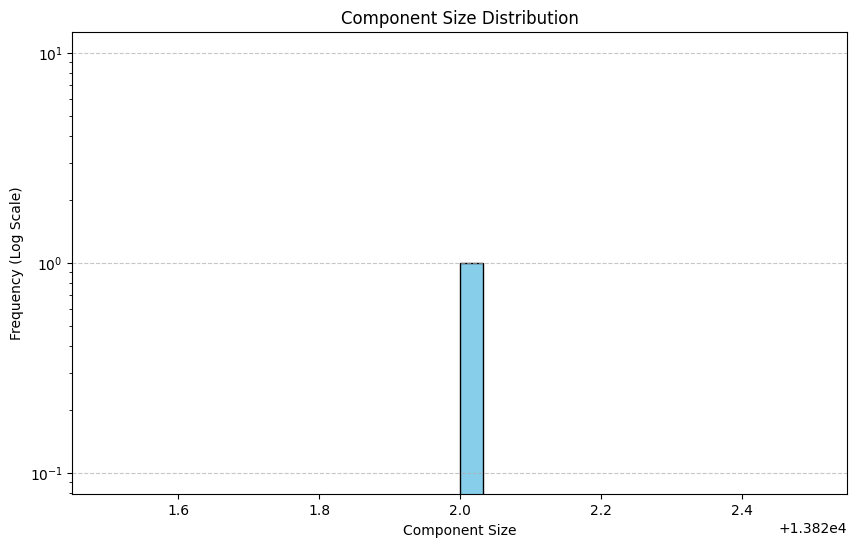

In [56]:
# Compute connected components
connected_components = list(nx.connected_components(G))

# Number of connected components
num_components = len(connected_components)

# Giant component (largest connected component)
giant_component = max(connected_components, key=len)
giant_component_size = len(giant_component)

# Component size distribution
component_sizes = sorted([len(component) for component in connected_components], reverse=True)

# Print the results
print(f"Number of connected components: {num_components}")
print(f"Size of the giant component: {giant_component_size}")
print("Component size distribution (Top 10 largest components):", component_sizes[:10])

# Convert component size distribution to a DataFrame for better visualization
component_sizes_df = pd.DataFrame(component_sizes, columns=["Component Size"])

# Display the results
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Component Size Distribution", dataframe=component_sizes_df)

# Visualization: Histogram of Component Sizes
plt.figure(figsize=(10, 6))
plt.hist(component_sizes, bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Component Size")
plt.ylabel("Frequency (Log Scale)")
plt.title("Component Size Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [72]:
# Create an undirected graph for component analysis
G_sub = nx.Graph()

# Add nodes from nodes_df
for _, row in nodes_df.iterrows():
    G_sub.add_node(row['id'], label=row['label'])

# Add edges from edges_df
for _, row in edges_df2.iterrows():
    G_sub.add_edge(row['source'], row['target'])

Number of connected components: 932
Size of the giant component: 12879
Component size distribution (Top 10 largest components): [12879, 13, 1, 1, 1, 1, 1, 1, 1, 1]
     Component Size
0             12879
1                13
2                 1
3                 1
4                 1
..              ...
927               1
928               1
929               1
930               1
931               1

[932 rows x 1 columns]


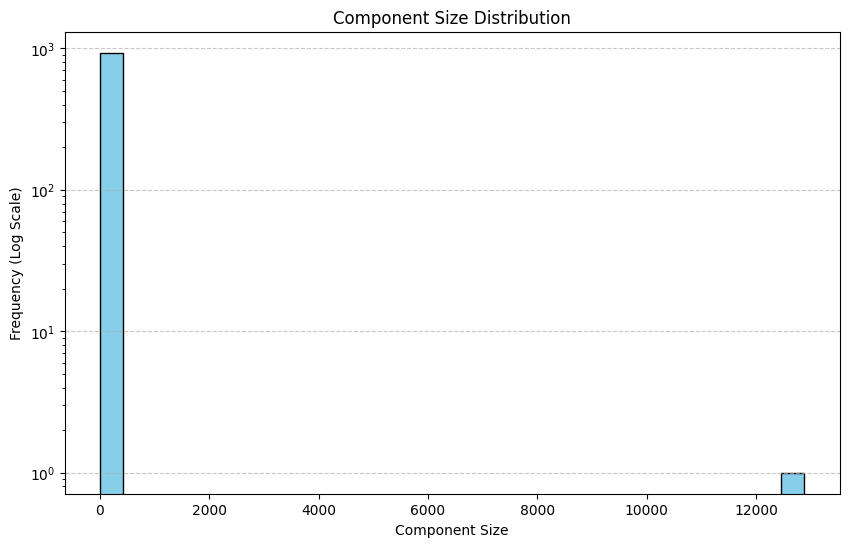

In [78]:
# Compute connected components
connected_components_sub = list(nx.connected_components(G_sub))

# Number of connected components
num_components_sub = len(connected_components_sub)

# Giant component (largest connected component)
giant_component_sub = max(connected_components_sub, key=len)
giant_component_size_sub = len(giant_component_sub)

# Component size distribution
component_sizes_sub = sorted([len(component) for component in connected_components_sub], reverse=True)

# Print the results
print(f"Number of connected components: {num_components_sub}")
print(f"Size of the giant component: {giant_component_size_sub}")
print("Component size distribution (Top 10 largest components):", component_sizes_sub[:10])

# Convert component size distribution to a DataFrame for better visualization
component_sizes_df_sub = pd.DataFrame(component_sizes_sub, columns=["Component Size"])

print(component_sizes_df_sub)
# Display the results
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Component Size Distribution", dataframe=component_sizes_df)

# Visualization: Histogram of Component Sizes
plt.figure(figsize=(10, 6))
plt.hist(component_sizes_sub, bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Component Size")
plt.ylabel("Frequency (Log Scale)")
plt.title("Component Size Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
# Extract the IDs of the nodes in the giant component
giant_component_nodes_sub = list(giant_component_sub)

# Print the IDs of the nodes in the giant component
print("Nodes in the giant component (IDs):", giant_component_nodes_sub)

# If you want to see the top 10 nodes in the giant component (for example)
print("Top 10 nodes in the giant component (IDs):", giant_component_nodes_sub[:10])

Nodes in the giant component (IDs): ['did:plc:aei6hxnjxn5tl4r2rqmyaucf', 'did:plc:owpc44gugqs3r6otogzmcyrp', 'did:plc:uqpagcvu66n5v7xdykaakods', 'did:plc:dc3gizgndejpxvqvcknegbei', 'did:plc:avt3adk32uswzjgdkzuqs24a', 'did:plc:cwx4tr52f7lase2gudrebpgs', 'did:plc:ms2g4lggkvrojqoruhehqmcb', 'did:plc:km4kpqqxt4zw67fcts5y34va', 'did:plc:dnwc6cvv7mi7htn45fgzj42u', 'did:plc:uufqcmcm66anrmtgzngvceqh', 'did:plc:lgckfw2ebefi6mlb465qnjgf', 'did:plc:rpfex3bmferr3z4z4d2qxz3a', 'did:plc:xbvinrfv4z7wydqqghw2i5ei', 'did:plc:txgwv3yr2vvqyvvaoj4hua74', 'did:plc:37jqoi6njitnn5ogmrcu6zvf', 'did:plc:enfrv7eubh6tclgkfjwc7c7o', 'did:plc:zclgpwg6sdp7bpkxnzqlxwcm', 'did:plc:iqrzokznn4my33n6kb5h7jjw', 'did:plc:ywwghra6ebvpds75vjn53c5j', 'did:plc:do65byi45hzv47wveazmaaf6', 'did:plc:pibwp3ljynto7wdswbjit6aw', 'did:plc:dgyve3bswtz67gouhwah5qal', 'did:plc:r5igi7z2pljkws5nuyffh736', 'did:plc:aoevtjqcel5ak2bqoqbsfskz', 'did:plc:pvi7wepv6qyip3tk3xdzan7j', 'did:plc:7dik6lzejg7qtqhdvnjro7ui', 'did:plc:vqx5egrm7juy7kswyo

In [80]:
# Compute degree for all nodes in the giant component
degrees = {node: G_sub.degree(node) for node in giant_component_nodes_sub}

# Sort nodes by degree (most connected first)
most_connected_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most connected nodes
print("Top 10 most connected accounts in the giant component:")
for node, degree in most_connected_nodes[:10]:
    print(f"Node ID: {node}, Connections (Degree): {degree}")

Top 10 most connected accounts in the giant component:
Node ID: did:plc:fry3mng673l3ded2qcnnjmzm, Connections (Degree): 605
Node ID: did:plc:57jga6ef7valolrnfsied35q, Connections (Degree): 603
Node ID: did:plc:csx7ak6ykohv7bkmtzkbgxm6, Connections (Degree): 601
Node ID: did:plc:h44pmcje35c4auateje3zys2, Connections (Degree): 598
Node ID: did:plc:2wi4vq2lwdfpmbxopryl5btn, Connections (Degree): 597
Node ID: did:plc:73nexmv6ayioio77eyujguic, Connections (Degree): 595
Node ID: did:plc:gqpt7bo6cjnueu63ky5yu2wm, Connections (Degree): 594
Node ID: did:plc:xptsxzprbrr7if3sml7nwzqw, Connections (Degree): 590
Node ID: did:plc:cmdumznhkrrdeemcpvu6fvqb, Connections (Degree): 589
Node ID: did:plc:arnyvobarl2firlvbuvwbpuy, Connections (Degree): 587


In [87]:
# Create a subgraph of the giant component
giant_component_subgraph = G_sub.subgraph(giant_component_nodes_sub)
# Compute degrees for all nodes in the giant component
degrees = dict(giant_component_subgraph.degree())

# Sort nodes by degree (most connected first)
top_10_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)[:10]

In [83]:


# Assign colors and sizes based on whether a node is in the top 10
node_colors = ["red" if node in top_10_nodes else "skyblue" for node in giant_component_subgraph.nodes()]
node_sizes = [300 if node in top_10_nodes else 50 for node in giant_component_subgraph.nodes()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(giant_component_subgraph, seed=42)  # Layout for positioning nodes
nx.draw(giant_component_subgraph, pos, node_color=node_colors, node_size=node_sizes, edge_color="gray", width=0.5, with_labels=False)

# Highlight the top 10 nodes with labels
labels = {node: node for node in top_10_nodes}  # Label only the top 10 nodes
nx.draw_networkx_labels(giant_component_subgraph, pos, labels, font_size=8, font_color="black")

plt.title("Giant Component with Top 10 Most Connected Nodes Highlighted")
plt.show()

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

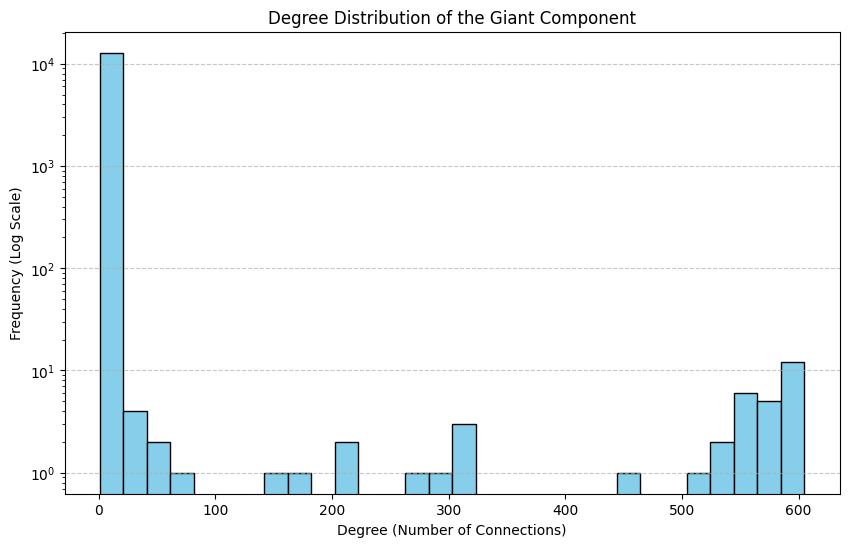

In [84]:
# Plot degree distribution
degrees = list(dict(giant_component_subgraph.degree()).values())
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, color="skyblue", edgecolor="black", log=True)
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Degree Distribution of the Giant Component")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

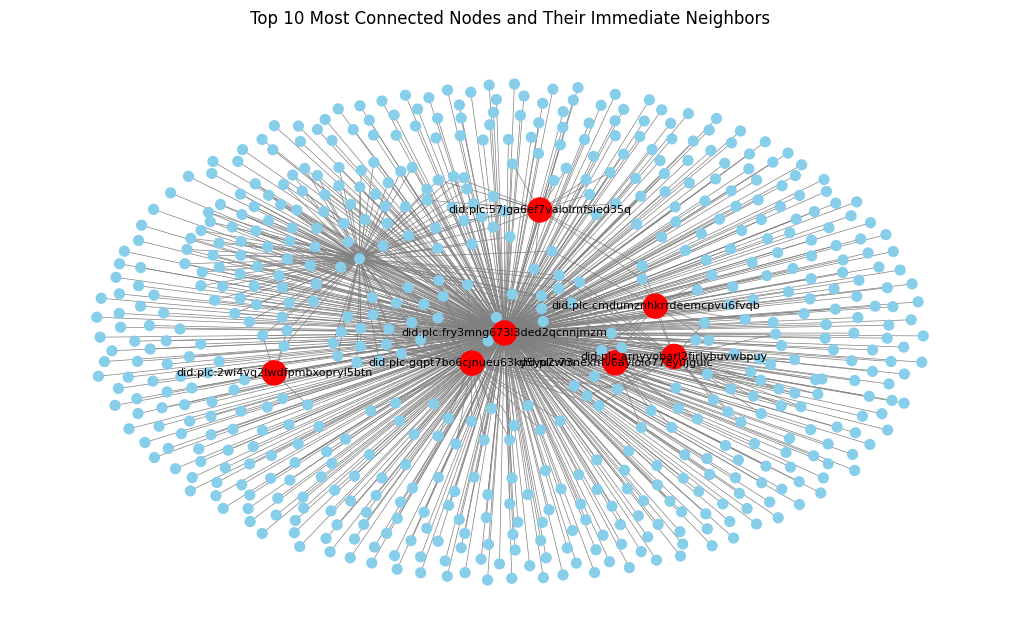

In [88]:
# Extract the top 10 nodes and their neighbors
top_10_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)[:10]
top_10_subgraph = nx.ego_graph(giant_component_subgraph, top_10_nodes[0], radius=1)  # Focus on the top node and its neighbors

# Assign colors and sizes
node_colors = ["red" if node in top_10_nodes else "skyblue" for node in top_10_subgraph.nodes()]
node_sizes = [300 if node in top_10_nodes else 50 for node in top_10_subgraph.nodes()]

# Draw the subgraph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(top_10_subgraph, seed=42)
nx.draw(top_10_subgraph, pos, node_color=node_colors, node_size=node_sizes, edge_color="gray", width=0.5, with_labels=False)

# Label only the top 10 nodes
labels = {node: node for node in top_10_nodes if node in top_10_subgraph.nodes()}
nx.draw_networkx_labels(top_10_subgraph, pos, labels, font_size=8, font_color="black")

plt.title("Top 10 Most Connected Nodes and Their Immediate Neighbors")
plt.show()

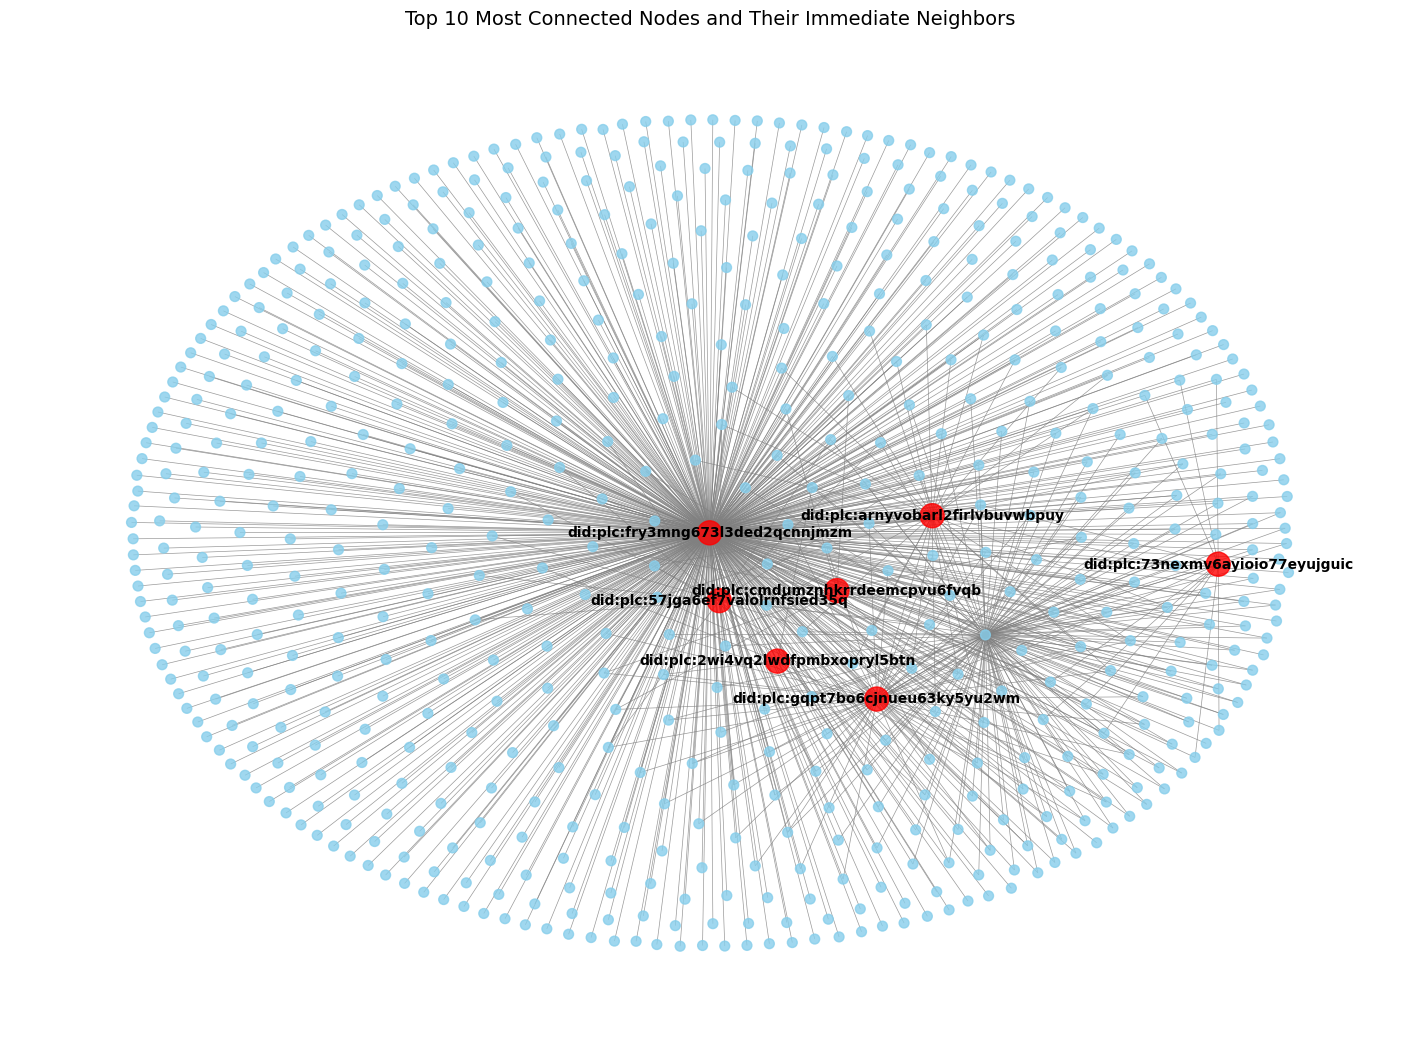

In [92]:
# Extract the top 10 nodes and their neighbors
top_10_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)[:10]
top_10_subgraph = nx.ego_graph(giant_component_subgraph, top_10_nodes[0], radius=1)  # Focus on the top node and its neighbors

# Assign colors and sizes
node_colors = ["red" if node in top_10_nodes else "skyblue" for node in top_10_subgraph.nodes()]
node_sizes = [300 if node in top_10_nodes else 50 for node in top_10_subgraph.nodes()]

# Draw the subgraph
plt.figure(figsize=(14, 10))  # Increase figure size
pos = nx.kamada_kawai_layout(top_10_subgraph)  # Use Kamada-Kawai layout for better spacing

# Draw nodes and edges
nx.draw(top_10_subgraph, pos, node_color=node_colors, node_size=node_sizes, edge_color="gray", width=0.5, alpha=0.8, with_labels=False)

# Label only the top 10 nodes
labels = {node: node for node in top_10_nodes if node in top_10_subgraph.nodes()}
nx.draw_networkx_labels(top_10_subgraph, pos, labels, font_size=10, font_color="black", font_weight="bold")

plt.title("Top 10 Most Connected Nodes and Their Immediate Neighbors", fontsize=14)
plt.show()

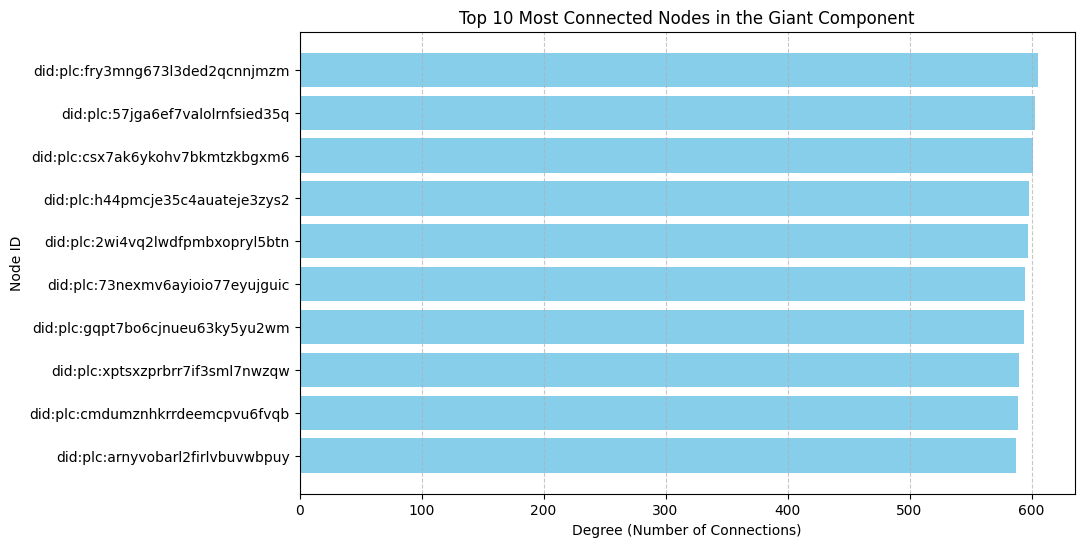

In [89]:
# Get the top 10 nodes and their degrees
top_10_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_ids = [node[0] for node in top_10_nodes]
top_10_degrees = [node[1] for node in top_10_nodes]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_ids, top_10_degrees, color="skyblue")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Node ID")
plt.title("Top 10 Most Connected Nodes in the Giant Component")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest degree at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Degree measures

Maximum node degree: 1097
Average node degree: 2.77


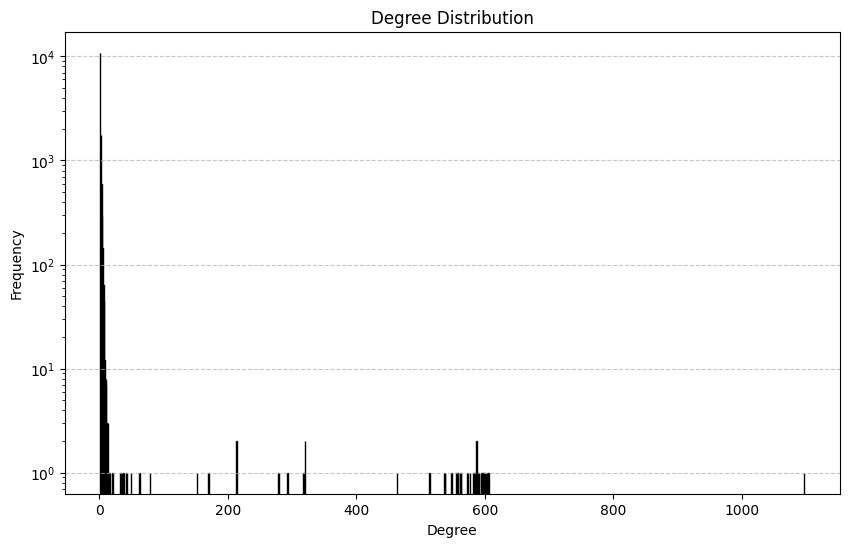

In [ ]:
# Compute degree for each node
degree_dict = dict(G.degree())

# Calculate degree statistics
max_degree = max(degree_dict.values())
avg_degree = sum(degree_dict.values()) / len(degree_dict)

# Create degree distribution
degree_distribution = pd.Series(list(degree_dict.values())).value_counts().sort_index()

# Print degree statistics
print(f"Maximum node degree: {max_degree}")
print(f"Average node degree: {avg_degree:.2f}")

# Convert degree distribution to a DataFrame for better visualization
degree_distribution_df = pd.DataFrame({'Degree': degree_distribution.index, 'Frequency': degree_distribution.values})

# Visualization: Degree Distribution
plt.figure(figsize=(10, 6))
plt.bar(degree_distribution.index, degree_distribution.values, color='skyblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.yscale('log')  # Log scale for better visibility of tail distribution
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Centrality measures

In [95]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Convert to DataFrame
centrality_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()]
})

# Display the centrality measures
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Centrality Measures", dataframe=centrality_df)

# Visualization: Degree Centrality Distribution
plt.figure(figsize=(10, 6))
plt.hist(centrality_df["Degree Centrality"], bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency (Log Scale)")
plt.title("Degree Centrality Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


KeyboardInterrupt: 

Average Clustering Coefficient: 0.0241
Total Number of Triangles: 1161


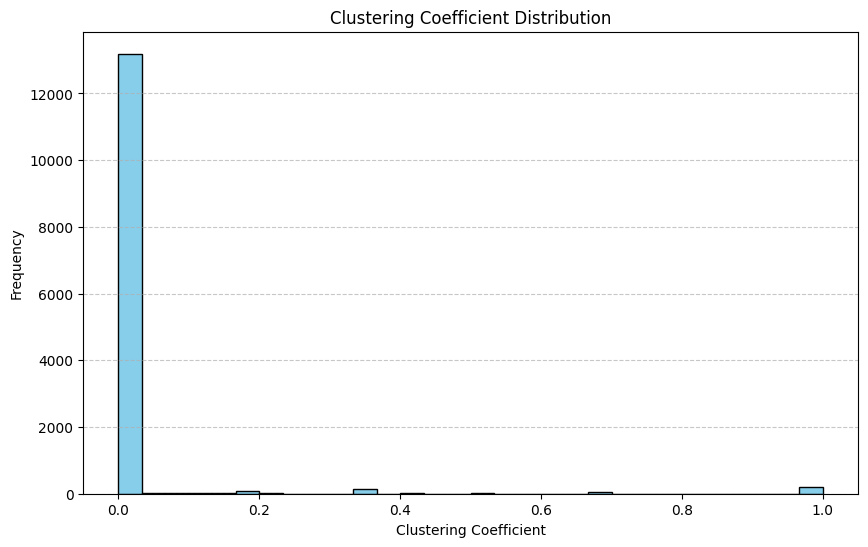

In [ ]:
# Compute clustering coefficient measures
avg_clustering_coeff = nx.average_clustering(G)
clustering_coeffs = nx.clustering(G)
num_triangles = sum(nx.triangles(G).values()) // 3  # Each triangle is counted 3 times

# Convert clustering coefficient distribution to a DataFrame
clustering_df = pd.DataFrame({
    'Node': list(clustering_coeffs.keys()),
    'Clustering Coefficient': list(clustering_coeffs.values())
})

# Print results
print(f"Average Clustering Coefficient: {avg_clustering_coeff:.4f}")
print(f"Total Number of Triangles: {num_triangles}")

# Visualization: Clustering Coefficient Distribution
plt.figure(figsize=(10, 6))
plt.hist(clustering_df["Clustering Coefficient"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Bridges and Local Bridges

In [ ]:
local_bridges = list(nx.local_bridges(G))
print("Local Bridges:", [(u, v) for u, v, _ in local_bridges])

In [118]:
# Find all bridges in the graph
bridges = list(nx.bridges(G_sub))

# Print the bridges
sum = 0 
print("Bridges in the graph:")
for bridge in bridges:
    print(bridge)
    sum = sum +1 
print(sum)

Bridges in the graph:
('did:plc:5xfbe643v22coansnm2ihxzc', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:ka4elaqhmeoq2kv7gbsiydgv', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:3wlxhtmjaaridk6ppzdxvpao', 'did:plc:2ru7cflz7pj6yvhfk6gxolxx')
('did:plc:pvpzvdg3mwhn5xwt4c3piqmy', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:lt6ol2jm6afptgbcir3apwi4')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:sunr6z4kvwrevadoa6ikitf3')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:ypqtjeiuwegv47h5usqi3mbw')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:ewshsprecajs7hfhw7235sci')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:kraosnpendv53moree37soe4')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:5oebnjg4nqngp5nvevyzbgc6')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:ywdbhr4tnlrvndlv2ainczom')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:qyokgbom3rmpbhfsfuk6crg6')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:6r4xf3avin6r3lmw4b5epaol')
('did:plc:p2b5tcx3mj24y3bf753

In [117]:
# Find all local bridges in the graph
local_bridges = []
for u, v in G_sub.edges():
    common_neighbors = set(G_sub.neighbors(u)).intersection(G_sub.neighbors(v))
    if len(common_neighbors) == 0:
        local_bridges.append((u, v))

# Print the local bridges
sum = 0 
print("Local bridges in the graph:")
for bridge in local_bridges:
    print(bridge)
    sum = sum +1 
print(sum)

Local bridges in the graph:
('did:plc:byjhl7extnzqkj7gus3aio7h', 'did:plc:p2b5tcx3mj24y3bf7532rtyr')
('did:plc:byjhl7extnzqkj7gus3aio7h', 'did:plc:arnyvobarl2firlvbuvwbpuy')
('did:plc:byjhl7extnzqkj7gus3aio7h', 'did:plc:faudkvtno35ou4j5jrhgbzqa')
('did:plc:5xfbe643v22coansnm2ihxzc', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:ka4elaqhmeoq2kv7gbsiydgv', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:3wlxhtmjaaridk6ppzdxvpao', 'did:plc:2ru7cflz7pj6yvhfk6gxolxx')
('did:plc:pvpzvdg3mwhn5xwt4c3piqmy', 'did:plc:2wi4vq2lwdfpmbxopryl5btn')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:xqcij5xi32dpesofx3pznzxc')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:jmn6hi2mxn3g2xuhleocj2qk')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:lt6ol2jm6afptgbcir3apwi4')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:tykz5c7hcgmz5jyws2mnsujl')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:sunr6z4kvwrevadoa6ikitf3')
('did:plc:p2b5tcx3mj24y3bf7532rtyr', 'did:plc:axevextc5hh3mxkihcfbu2dq')
('did:plc:p2b5tcx3mj24y

In [ ]:
import matplotlib.pyplot as plt

# Create a layout for the graph
pos = nx.spring_layout(G_sub, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G_sub, pos, node_color="skyblue", node_size=50, edge_color="gray", width=0.5, with_labels=False)

# Highlight bridges in red
nx.draw_networkx_edges(G_sub, pos, edgelist=bridges, edge_color="red", width=2)

# Highlight local bridges in blue
nx.draw_networkx_edges(G_sub, pos, edgelist=local_bridges, edge_color="blue", width=2, style="dashed")

# Add labels for bridges and local bridges
labels = {node: node for node in G_sub.nodes() if node in [u for u, v in bridges] + [v for u, v in bridges]}
nx.draw_networkx_labels(G_sub, pos, labels, font_size=8, font_color="black")

plt.title("Graph with Bridges (Red) and Local Bridges (Blue Dashed)")
plt.show()

KeyboardInterrupt: 

In [106]:
import matplotlib.pyplot as plt

# Create a subgraph containing only the bridges and their connected nodes
bridge_nodes = set()
for u, v in bridges:
    bridge_nodes.add(u)
    bridge_nodes.add(v)
bridge_subgraph = G_sub.subgraph(bridge_nodes)

# Create a layout using Kamada-Kawai
pos = nx.kamada_kawai_layout(bridge_subgraph)

# Draw the subgraph
plt.figure(figsize=(10, 8))
nx.draw(bridge_subgraph, pos, node_color="skyblue", node_size=100, edge_color="gray", width=1, with_labels=False)

# Highlight bridges in red
nx.draw_networkx_edges(bridge_subgraph, pos, edgelist=bridges, edge_color="red", width=2)

# Add labels for nodes connected by bridges
labels = {node: node for node in bridge_subgraph.nodes()}
nx.draw_networkx_labels(bridge_subgraph, pos, labels, font_size=8, font_color="black")

plt.title("Bridges in the Graph (Highlighted in Red)")
plt.show()

KeyboardInterrupt: 

In [ ]:
# Calculate edge betweenness centrality for all edges
#edge_betweenness = nx.edge_betweenness_centrality(G)
edge_betweenness = nx.edge_betweenness_centrality(G, k=50)  # Uses 50 shortest paths
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Most Important Bridges by Betweenness Centrality:")
for edge, centrality in sorted_edges[:10]:
    print(f"Edge {edge} - Betweenness Centrality: {centrality}")

Top 10 Most Important Bridges by Betweenness Centrality:
Edge ('did:plc:57jga6ef7valolrnfsied35q', 'did:plc:p7gxyfr5vii5ntpwo7f6dhe2') - Betweenness Centrality: 8.334118999825237e-05
Edge ('did:plc:73nexmv6ayioio77eyujguic', 'did:plc:p7gxyfr5vii5ntpwo7f6dhe2') - Betweenness Centrality: 8.030506961217023e-05
Edge ('did:plc:bfonvxegjnymnopmjq7qys3d', 'did:plc:p7gxyfr5vii5ntpwo7f6dhe2') - Betweenness Centrality: 7.60719129069907e-05
Edge ('did:plc:xptsxzprbrr7if3sml7nwzqw', 'did:plc:a6dj6lzjm5jmeg6fwq574o6q') - Betweenness Centrality: 7.260492906749698e-05
Edge ('did:plc:57jga6ef7valolrnfsied35q', 'did:plc:wm6vq2qjn4mlctqluszaosk3') - Betweenness Centrality: 7.260492906749698e-05
Edge ('did:plc:57jga6ef7valolrnfsied35q', 'did:plc:7hcmurlkueupm7ibtkmxingo') - Betweenness Centrality: 7.260492906749698e-05
Edge ('did:plc:z6ss46sy63n6byr44znftp2e', 'did:plc:ud5zkokt3ftamra6abd4mgky') - Betweenness Centrality: 7.260492906749698e-05
Edge ('did:plc:h44pmcje35c4auateje3zys2', 'did:plc:gtoz3mo64xz

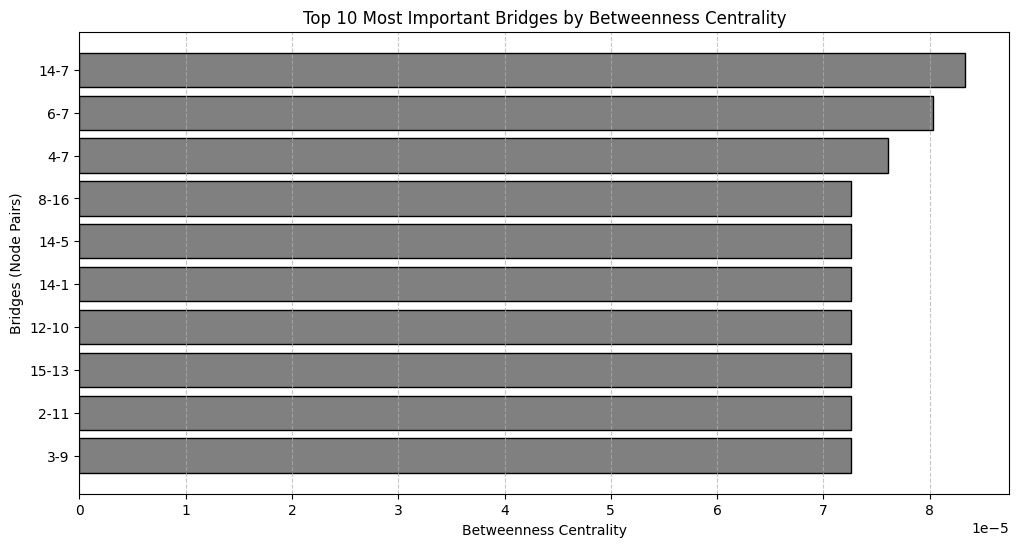

In [115]:
# Convert DID names to numbers
did_to_id = {did: idx for idx, did in enumerate(set([node for edge, _ in sorted_edges[:10] for node in edge]), start=1)}
numeric_bridges = [(did_to_id[edge[0]], did_to_id[edge[1]], centrality) for edge, centrality in sorted_edges[:10]]

# Extract node pairs and their betweenness values
node_labels = [f"{u}-{v}" for u, v, _ in numeric_bridges]
betweenness_values = [centrality for _, _, centrality in numeric_bridges]

# Visualization: Histogram of Top 10 Bridges by Betweenness Centrality
plt.figure(figsize=(12, 6))
plt.barh(node_labels, betweenness_values, color='grey', edgecolor='black')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Bridges (Node Pairs)")
plt.title("Top 10 Most Important Bridges by Betweenness Centrality")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

KeyError: 'did:plc:57jga6ef7valolrnfsied35q'

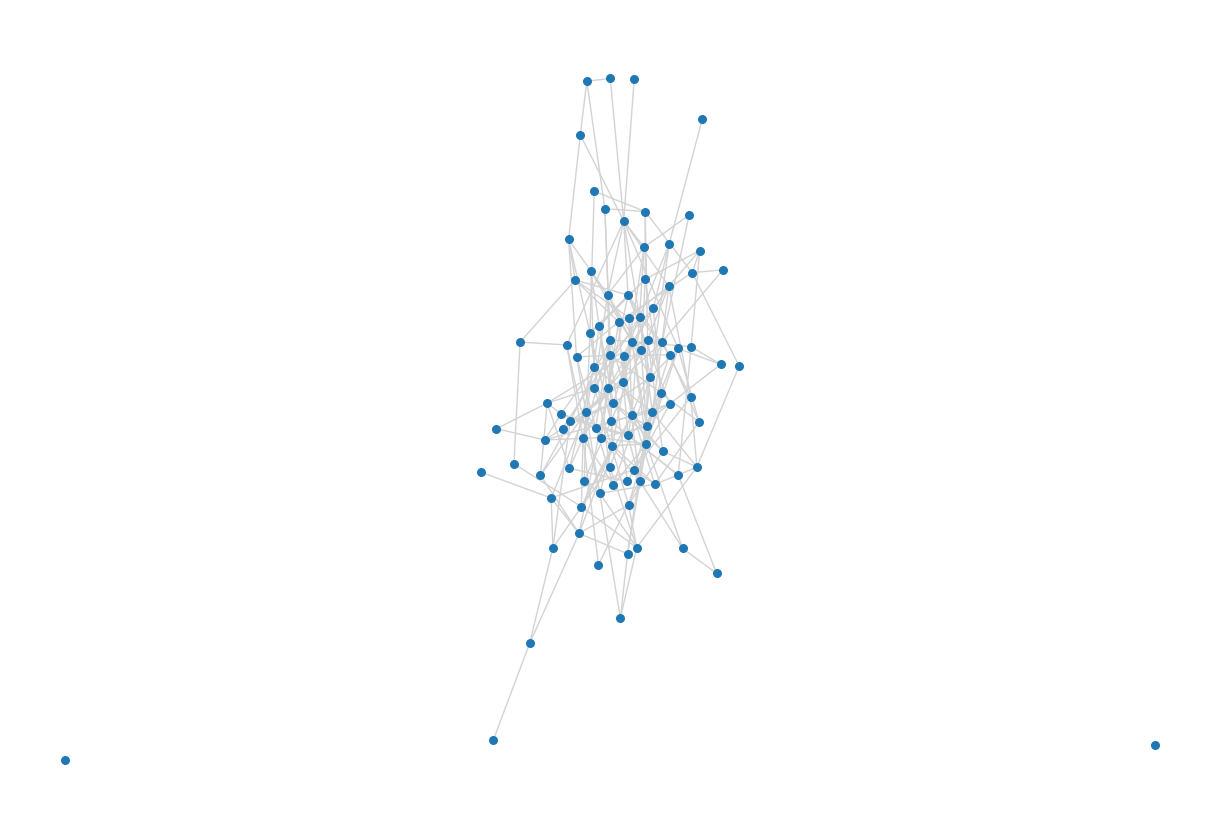

In [113]:
# Get positions for visualization
pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for consistency

# Extract top 10 important bridges
top_bridges = [edge for edge, _ in sorted_edges[:10]]

# Draw the full graph in light gray
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=30, edge_color="lightgray")

# Highlight top bridges in red
nx.draw_networkx_edges(G, pos, edgelist=top_bridges, edge_color="red", width=2, label="Top Bridges")

# Add title and legend
plt.title("Top 10 Most Important Bridges by Betweenness Centrality")
plt.legend()
plt.show()

In [ ]:
# Rank bridges by the sum of degrees of their endpoints
bridge_importance = {}
for u, v in nx.bridges(G):
    bridge_importance[(u, v)] = G.degree[u] + G.degree[v]

# Sort bridges by the degree sum in descending order
sorted_bridges = sorted(bridge_importance.items(), key=lambda x: x[1], reverse=True)

# Print top 10 most important bridges
print("Top 10 Most Important Bridges by Node Degree:")
for edge, degree_sum in sorted_bridges[:10]:
    print(f"Bridge {edge} - Degree Sum: {degree_sum}")

In [137]:
# Load or create a graph (Replace this with your actual graph)
G = nx.erdos_renyi_graph(100, 0.05)  # Example: Random graph with 100 nodes

# Rank bridges by the sum of degrees of their endpoints (simplified)
sorted_bridges = sorted(
    [(edge, G.degree[edge[0]] + G.degree[edge[1]]) for edge in nx.bridges(G)],
    key=lambda x: x[1], reverse=True
)

# Print top 10 most important bridges
print("Top 10 Most Important Bridges by Node Degree:")
for edge, degree_sum in sorted_bridges[:10]:
    print(f"Bridge {edge} - Degree Sum: {degree_sum}")


Top 10 Most Important Bridges by Node Degree:
Bridge (11, 35) - Degree Sum: 12
Bridge (40, 77) - Degree Sum: 10
Bridge (64, 71) - Degree Sum: 8
Bridge (10, 62) - Degree Sum: 5
Bridge (48, 96) - Degree Sum: 5


In [151]:
# Create a layout for visualization
pos = nx.spring_layout(G, seed=42)  # Use spring layout for positioning nodes

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

# Highlight bridges in red
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color="red", width=2, label="Bridges")

# Highlight local bridges in orange
nx.draw_networkx_edges(G, pos, edgelist=local_bridges, edge_color="orange", width=2, label="Local Bridges")

# Add legend
plt.legend()
plt.title("Bridges (Red) and Local Bridges (Orange)")
plt.show()



KeyboardInterrupt: 

In [150]:
# Compute the number of triangles per node
#del sum  # Resets sum if it was redefined

triangle_dict = nx.triangles(G)  # Returns a dictionary {node: triangle_count}

# Ensure there is no variable named `int` that conflicts
total_triangles = sum(triangle_dict.values()) // 3  # Each triangle is counted three times

# Check if any triangles exist
if total_triangles > 0:
    print(f"Triangles exist in the graph! Total: {total_triangles}")
else:
    print(" No triangles found in the graph.")


Triangles exist in the graph! Total: 1161


In [154]:
import pandas as pd
import re

# Define a function to extract gender
def extract_gender(text):
    if pd.isna(text):  # Check if the text is NaN
        return None
    
    # Keywords for male, female, and non-binary
    male_keywords = ['male', 'man', 'he/him', 'he/his', 'boy', 'mister', 'mr', 'dude', 'guy', 'father', 'dad', 'brother',"himself", "husband"]
    female_keywords = ['female', "she/her","she/hers", 'woman', 'girl', 'miss', 'mrs', 'ms', 'lady', 'mother', 'mom', 'sister', "herself", "wife"]
    non_binary_keywords = ['non-binary', 'nonbinary', 'enby', 'they/them', 'them', 'their']
 
    
    # Check for male keywords
    for keyword in male_keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):
            return 'Male'
    
    # Check for female keywords
    for keyword in female_keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):
            return 'Female'
    
    # Check for non-binary keywords
    for keyword in non_binary_keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):
            return 'Non-Binary'
    
    # If no keywords are found, return None
    return None

# Apply the function to the displayName and description columns
followers_df['gender'] = followers_df['displayName'].apply(extract_gender)
followers_df['gender'] = followers_df['gender'].combine_first(followers_df['description'].apply(extract_gender))

# Count the occurrences of each gender category
gender_counts = followers_df['gender'].value_counts(dropna=False).rename('count')

# Display the updated DataFrame and gender counts
print(followers_df[['did', 'handle', 'displayName', 'description', 'gender']])
print("\nGender Counts:")
print(gender_counts)

                                   did                         handle  \
0     did:plc:fyed7gu7dc3a2y4lkq4numkt              dpotr.bsky.social   
1     did:plc:qigqnhwxe6phwrg2keyy6wcx               mexz.bsky.social   
2     did:plc:k6zpbglcg56tyzknn2nj5sk3  advocatetherapist.bsky.social   
3     did:plc:4walwj45q4ue36ozgdtavyrj     blanketyblanks.bsky.social   
4     did:plc:fhnphuonsndlha5ygyvxnxvk     1nvisiblewoman.bsky.social   
...                                ...                            ...   
1093  did:plc:f6j6x4zd37la7k5shs2igjsv   mrscaptaincanada.bsky.social   
1094  did:plc:lzobfn3liuaa67cdz2zw77z7       piggypoohpie.bsky.social   
1095  did:plc:goutzaecyogmp6rrga5drsrj  sirrichardrichard.bsky.social   
1096  did:plc:ww2jhmi3n4r4aypkybd5hflf         mariefurie.bsky.social   
1097  did:plc:ts76vdbzebhil2yf5nsix43v         wiscalison.bsky.social   

                        displayName  \
0                            Doug P   
1                              mexz   
2     

In [156]:
# Apply the gender extraction function to all_connections_df
all_connections_df['gender'] = all_connections_df['displayName'].apply(extract_gender)
all_connections_df['gender'] = all_connections_df['gender'].combine_first(all_connections_df['description'].apply(extract_gender))

# Count the occurrences of each gender category in all_connections_df
gender_counts_all_connections = all_connections_df['gender'].value_counts(dropna=False).rename('count')

# Calculate the total number of people checked
total_people_checked = len(all_connections_df)

# Display the updated DataFrame and gender counts
print(all_connections_df[['did', 'handle', 'displayName', 'description', 'gender']])
print("\nGender Counts for all_connections_df:")
print(gender_counts_all_connections)
print(f"\nTotal number of people checked: {total_people_checked}")

                                    did                       handle  \
0      did:plc:xqcij5xi32dpesofx3pznzxc        bebeward1.bsky.social   
1      did:plc:jmn6hi2mxn3g2xuhleocj2qk          catgurl.bsky.social   
2      did:plc:orygrp6nnu4lixuuaje6ltl5       anita-vent.bsky.social   
3      did:plc:lt6ol2jm6afptgbcir3apwi4          joaneef.bsky.social   
4      did:plc:tykz5c7hcgmz5jyws2mnsujl             5iii.bsky.social   
...                                 ...                          ...   
18027  did:plc:q3kvsr7iehj5jka25ymoeabn    comrademeagle.bsky.social   
18028  did:plc:ix4hswli635mquet3yv5gryz       caligirl76.bsky.social   
18029  did:plc:s6zn6cteu5f3za4vdvej7tx5      6babypeanut.bsky.social   
18030  did:plc:zz5l7nca2ad2jmi3qcmxro4v  traveleratheart.bsky.social   
18031  did:plc:td7vaysnlg2n2ya3ddjd4uou         beachnic.bsky.social   

          displayName                                        description  \
0        Barbara Ward  Liberal and passionate about rights 

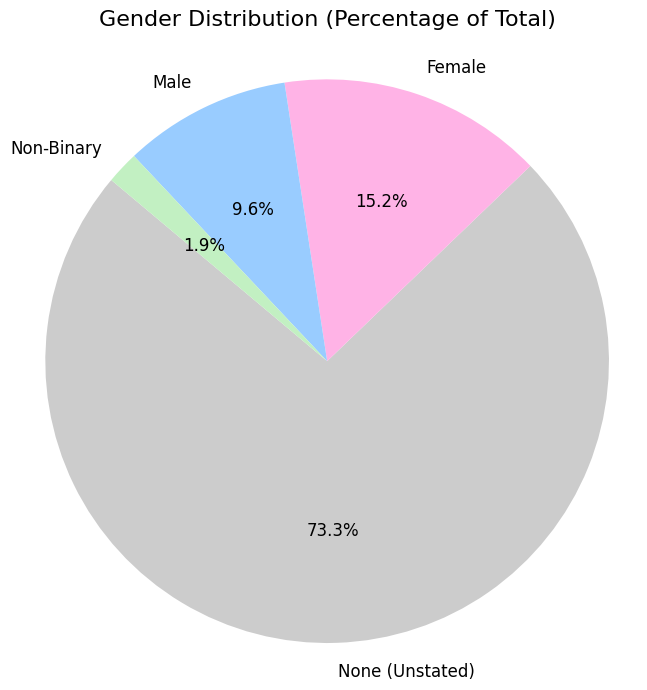

In [158]:
import matplotlib.pyplot as plt

# Data
gender_data = {
    'None (Unstated)': 14020,
    'Female': 2915,
    'Male': 1837,
    'Non-Binary': 357
}

# Convert counts to percentages
total = sum(gender_data.values())
percentages = {k: (v / total) * 100 for k, v in gender_data.items()}

# Labels and sizes for the pie chart
labels = percentages.keys()
sizes = percentages.values()

# Colors for the pie chart
colors = ['#cccccc', '#ffb3e6', '#99ccff', '#c2f0c2'] 

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

# Add a title
plt.title('Gender Distribution (Percentage of Total)', fontsize=16, pad=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

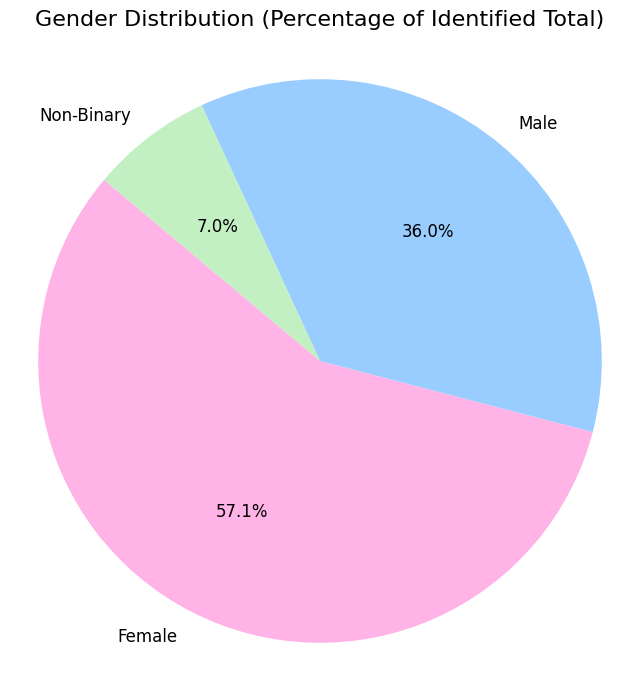

In [159]:
# Data for identified genders
identified_gender_data = {
    'Female': 2915,
    'Male': 1837,
    'Non-Binary': 357
}

# Calculate the total of identified genders
identified_total = sum(identified_gender_data.values())
percentages = {k: (v / identified_total) * 100 for k, v in identified_gender_data.items()}
labels = percentages.keys()
sizes = percentages.values()
colors = ['#ffb3e6', '#99ccff', '#c2f0c2']  # Light Pink, Light Blue, Light Green

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Gender Distribution (Percentage of Identified Total)', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

In [166]:
# Combine gender information from both dataframes
gender_mapping = pd.concat([
    followers_df[['did', 'gender']],
    all_connections_df[['did', 'gender']],
]).drop_duplicates(subset=['did']).set_index('did')['gender'].to_dict()

# Map gender to edges_df
edges_df['source_gender'] = edges_df['source'].map(gender_mapping)
edges_df['target_gender'] = edges_df['target'].map(gender_mapping)

print(edges_df)

                                 source                            target  \
0      did:plc:4nactsnu2nyertryhurjakwb  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
1      did:plc:xzteqos2rx5b72vfqbrbt7oe  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
2      did:plc:eb4456pnebrvvmkcbf5jf3yq  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
3      did:plc:fq3t4yqgtnuebv4xsaptivak  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
4      did:plc:ea3mluwhw5et6qhxkx7sybtx  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
...                                 ...                               ...   
19124  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:q3kvsr7iehj5jka25ymoeabn   
19125  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:ix4hswli635mquet3yv5gryz   
19126  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:s6zn6cteu5f3za4vdvej7tx5   
19127  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:zz5l7nca2ad2jmi3qcmxro4v   
19128  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:td7vaysnlg2n2ya3ddjd4uou   

      source_gender target_gender  
0              None           NaN  
1  

In [167]:
# Step 3: Create the graph
G = nx.Graph()

# Add edges to the graph
for _, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    G.add_edge(source, target)

# Step 4: Assign gender attributes to nodes
nx.set_node_attributes(G, gender_mapping, 'gender')

# Step 5: Compute the assortativity coefficient for gender
assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'gender')

# Print the result
print(f"Assortativity Coefficient (Homophily Score) for Gender: {assortativity_coefficient:.4f}")


Assortativity Coefficient (Homophily Score) for Gender: -0.0189


In [169]:
# Drop rows where both source_gender and target_gender are None or NaN
edges_df_reduced = edges_df.dropna(subset=['source_gender', 'target_gender'], how='all')

# Display the reduced DataFrame
print(edges_df_reduced)

# Step 3: Create the graph
G = nx.Graph()

# Add edges to the graph
for _, row in edges_df_reduced.iterrows():
    source = row['source']
    target = row['target']
    G.add_edge(source, target)

# Step 4: Assign gender attributes to nodes
nx.set_node_attributes(G, gender_mapping, 'gender')

# Step 5: Compute the assortativity coefficient for gender
assortativity_coefficient = nx.attribute_assortativity_coefficient(G, 'gender')

# Print the result
print(f"Assortativity Coefficient (Homophily Score) for Gender: {assortativity_coefficient:.4f}")

                                 source                            target  \
7      did:plc:byjhl7extnzqkj7gus3aio7h  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
19     did:plc:67pmkedneta4ey6etrisnwyk  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
20     did:plc:3wlxhtmjaaridk6ppzdxvpao  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
27     did:plc:seao7ayxnnmwevginwl2a2ym  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
36     did:plc:pgr2xq5no2wplaor6ddr2y5g  did:plc:p7gxyfr5vii5ntpwo7f6dhe2   
...                                 ...                               ...   
19117  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:mzn5vgvlhyhprknale2fle72   
19120  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:l7kql3al5wnrxo5i2xzjpb37   
19121  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:7w2ngfib2wf4xj6wglpmmjj4   
19125  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:ix4hswli635mquet3yv5gryz   
19126  did:plc:ctuew6nbiw5j4tj7pwujdip7  did:plc:s6zn6cteu5f3za4vdvej7tx5   

      source_gender target_gender  
7              Male           NaN  
19 

In [170]:
# Count internal and external connections
internal_connections = edges_df_reduced[edges_df_reduced['source_gender'] == edges_df_reduced['target_gender']].shape[0]
external_connections = edges_df_reduced[edges_df_reduced['source_gender'] != edges_df_reduced['target_gender']].shape[0]

# Compute the E-I Index
if (external_connections + internal_connections) > 0:
    ei_index = (external_connections - internal_connections) / (external_connections + internal_connections)
else:
    ei_index = 0  # Handle case where there are no connections

# Print the results
print(f"Internal Connections: {internal_connections}")
print(f"External Connections: {external_connections}")
print(f"E-I Index: {ei_index:.4f}")

Internal Connections: 398
External Connections: 7493
E-I Index: 0.8991


In [182]:
categories = {
   'democrats': [
        'democrat', 'liberal', 'progressive', 'biden', 'kamala', 'harris', 'democratic party', 
        'left wing', 'social justice', 'equality', 'climate action', 'healthcare', 'voting rights', 
        'gun control', 'immigration reform', 'justice'
    ],
    'anti-trump': [
        'anti-trump', 'resist', 'fight', 'not my president', 'trump hater', 'trump', 'maga', 'impeach', 
        'russia investigation', 'fake news', 'corruption', 'authoritarian', 'dictator', 'racism',   'xenophobia', 'misogyny', 'climate denial'
    ]
}


def assign_categories(df, categories):
    """
    Assign categories to nodes based on keywords in the description column.
    """
    for category, keywords in categories.items():
        # Create a new column for each category
        df[category] = df['description'].str.contains('|'.join(keywords), case=False, na=False)
    return df

# Apply the function to all_connections_df and followers_df
all_connections_df = assign_categories(all_connections_df, categories)
followers_df = assign_categories(followers_df, categories)
combined_df = pd.concat([all_connections_df, followers_df], ignore_index=True)
print(len(all_connections_df))
print(len(followers_df))
print(len(combined_df))
# Check for duplicate 'did' values
duplicates = combined_df.duplicated(subset=['did'], keep=False)
if duplicates.any():
    print(f"Found {duplicates.sum()} duplicate 'did' values. Handling duplicates...")

    # Option 1: Keep the first occurrence of each duplicate
    combined_df = combined_df.drop_duplicates(subset=['did'], keep='first')

    # Option 2: Aggregate duplicates (e.g., combine categories)
    # combined_df = combined_df.groupby('did').agg(lambda x: x.any()).reset_index()

node_categories = combined_df.set_index('did')[list(categories.keys())].to_dict(orient='index')

print(len(combined_df))
      

18032
1098
19130
Found 8252 duplicate 'did' values. Handling duplicates...
13825


In [183]:
from pprint import pprint

# Create the node_categories dictionary
node_categories = combined_df.set_index('did')[list(categories.keys())].to_dict(orient='index')

# Print the dictionary in a readable format
pprint(node_categories)

{'did:plc:22256y5lmkbo4umqozjryj7g': {'anti-trump': False, 'democrats': False},
 'did:plc:223eaz6uecpa3t63jdlojutp': {'anti-trump': False, 'democrats': False},
 'did:plc:223safemhkp4ke2wtj5k7xni': {'anti-trump': False, 'democrats': False},
 'did:plc:22427wgugtnma5atrphexl6r': {'anti-trump': True, 'democrats': False},
 'did:plc:226qeogn3xfqwfm24z2jtqxl': {'anti-trump': False, 'democrats': False},
 'did:plc:22buia7fdvjd6jeh26are4zt': {'anti-trump': True, 'democrats': True},
 'did:plc:22eyyli2epi5ulytzs5rn3ed': {'anti-trump': False, 'democrats': False},
 'did:plc:22ip2zbem7eveznzxia4tslv': {'anti-trump': False, 'democrats': False},
 'did:plc:22jj54ahzx6w7uqqlc6ywhft': {'anti-trump': True, 'democrats': False},
 'did:plc:22lfm6wexmfthj65ggmzizmp': {'anti-trump': False, 'democrats': False},
 'did:plc:22suonhd5a5nihhbi3ljf2ik': {'anti-trump': False, 'democrats': False},
 'did:plc:22udfblj5z7nwcymgekqse6k': {'anti-trump': True, 'democrats': False},
 'did:plc:22uju6d7p2kl7vkv267vc72v': {'anti-t

In [184]:
def compute_ei_index(edges_df, node_categories, category):
    """
    Compute the E-I Index for a specific category.
    """
    # Map categories to edges_df
    edges_df['source_category'] = edges_df['source'].map(lambda x: node_categories.get(x, {}).get(category, False))
    edges_df['target_category'] = edges_df['target'].map(lambda x: node_categories.get(x, {}).get(category, False))

    # Drop rows where both source_category and target_category are False
    edges_df_reduced = edges_df[(edges_df['source_category'] != False) | (edges_df['target_category'] != False)]

    # Count internal and external connections
    internal_connections = edges_df_reduced[edges_df_reduced['source_category'] & edges_df_reduced['target_category']].shape[0]
    external_connections = edges_df_reduced[edges_df_reduced['source_category'] != edges_df_reduced['target_category']].shape[0]

    # Compute the E-I Index
    if (external_connections + internal_connections) > 0:
        ei_index = (external_connections - internal_connections) / (external_connections + internal_connections)
    else:
        ei_index = 0  # Handle case where there are no connections

    return ei_index

In [185]:
# Compute E-I Index for each category
for category in categories.keys():
    ei_index = compute_ei_index(edges_df, node_categories, category)
    print(f"E-I Index for {category}: {ei_index:.4f}")

E-I Index for democrats: 0.5081
E-I Index for anti-trump: 0.3972


In [186]:
def count_category_scenarios(edges_df, node_categories, category):
    """
    Count the number of connections where:
    1. Both nodes are True for the category.
    2. First node is True, second is False.
    3. First node is False, second is True.
    """
    # Map categories to edges_df
    edges_df['source_category'] = edges_df['source'].map(lambda x: node_categories.get(x, {}).get(category, False))
    edges_df['target_category'] = edges_df['target'].map(lambda x: node_categories.get(x, {}).get(category, False))

    # Count scenarios
    both_true = edges_df[edges_df['source_category'] & edges_df['target_category']].shape[0]
    first_true_second_false = edges_df[edges_df['source_category'] & ~edges_df['target_category']].shape[0]
    first_false_second_true = edges_df[~edges_df['source_category'] & edges_df['target_category']].shape[0]

    return both_true, first_true_second_false, first_false_second_true

# Categories to analyze
categories_to_analyze = ['democrats', 'anti-trump']

# Loop through each category and count scenarios
for category in categories_to_analyze:
    both_true, first_true_second_false, first_false_second_true = count_category_scenarios(edges_df, node_categories, category)
    print(f"Category: {category}")
    print(f"Both True: {both_true}")
    print(f"First True, Second False: {first_true_second_false}")
    print(f"First False, Second True: {first_false_second_true}")
    print()

Category: democrats
Both True: 3594
First True, Second False: 9854
First False, Second True: 1166

Category: anti-trump
Both True: 3919
First True, Second False: 6755
First False, Second True: 2329



In [ ]:
import community  # python-louvain package

# Compute communities using the Louvain method
partition = community.best_partition(G)
modularity_score = community.modularity(partition, G)
print(f"Modularity Score: {modularity_score:.4f}")


Modularity Score: 0.7481
